In [ ]:
#fit the model at 3:20 pm 
#make the map (tomorrow)

In [18]:
import pandas as pd
import pmdarima as pm
from pmdarima.arima import auto_arima
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("paper", font_scale = 1.4)
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math
import warnings
warnings.simplefilter("ignore")
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from matplotlib.pylab import rcParams
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#no fbprophet import 

In [34]:
df2 = pd.read_csv('df1.csv')

In [42]:
df2.head()

,Complaint_Date,Complaint_Time,Crime,Crime_Description,Offense,Borough,X_COORD_CD,Y_COORD_CD,Suspect_Age,Suspect_Gender,Patrol_Borough,Station_Name,Victim Age,Victim_Race,Victim_Gender,Complaint_Date_Time
0,06/09/2018,15:54:00,GRAND LARCENY,"LARCENY,GRAND FROM PERSON,PURS",FELONY,BRONX,1010257.0,248767.0,<18,M,PATROL BORO BRONX,TREMONT AVENUE,45-64,WHITE HISPANIC,F,2018-06-09 15:54:00
1,05/19/2018,12:25:00,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",FELONY,MANHATTAN,990886.0,213048.0,45-64,M,PATROL BORO MAN SOUTH,42 ST.-GRAND CENTRAL,25-44,WHITE,F,2018-05-19 12:25:00
2,11/04/2018,00:00:00,DANGEROUS WEAPONS,WEAPONS POSSESSION 3,FELONY,MANHATTAN,980772.0,194845.0,25-44,M,PATROL BORO MAN SOUTH,SOUTH FERRY,65+,BLACK,M,2018-11-04 00:00:00
3,01/18/2018,12:23:00,POSSESSION OF STOLEN PROPERTY,"STOLEN PROPERTY 3,POSSESSION",MISDEMEANOR,MANHATTAN,989294.0,215445.0,25-44,M,PATROL BORO MAN SOUTH,47-50 STS./ROCKEFELLER CTR.,25-44,WHITE,M,2018-01-18 12:23:00
4,12/29/2018,21:30:00,JOSTLING,JOSTLING,MISDEMEANOR,BRONX,1004749.0,240880.0,45-64,F,PATROL BORO BRONX,161 ST.-YANKEE STADIUM,25-44,BLACK HISPANIC,M,2018-12-29 21:30:00


In [45]:
print(df2.shape)

(16349, 16)


In [38]:
df2.isna().sum()

Unnamed: 0             0
Complaint_Date         0
Complaint_Time         0
Crime                  0
Crime_Description      0
Offense                0
Borough                0
X_COORD_CD             0
Y_COORD_CD             0
Suspect_Age            0
Suspect_Gender         0
Patrol_Borough         0
Station_Name           0
Victim Age             0
Victim_Race            0
Victim_Gender          0
Complaint_Date_Time    0
dtype: int64

In [37]:
# drop null values
df2 = df2.dropna(how='any',axis=0) 

In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16349 entries, 0 to 16470
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Complaint_Date       16349 non-null  object 
 1   Complaint_Time       16349 non-null  object 
 2   Crime                16349 non-null  object 
 3   Crime_Description    16349 non-null  object 
 4   Offense              16349 non-null  object 
 5   Borough              16349 non-null  object 
 6   X_COORD_CD           16349 non-null  float64
 7   Y_COORD_CD           16349 non-null  float64
 8   Suspect_Age          16349 non-null  object 
 9   Suspect_Gender       16349 non-null  object 
 10  Patrol_Borough       16349 non-null  object 
 11  Station_Name         16349 non-null  object 
 12  Victim Age           16349 non-null  object 
 13  Victim_Race          16349 non-null  object 
 14  Victim_Gender        16349 non-null  object 
 15  Complaint_Date_Time  16349 non-null 

In [40]:
df2.drop(columns = 'Unnamed: 0', inplace = True)

In [44]:
# check borough values
df2['Borough'].value_counts()

MANHATTAN    6477
BROOKLYN     5174
BRONX        2606
QUEENS       2092
Name: Borough, dtype: int64

In [49]:
df2.Complaint_Date.min()

'01/01/2006'

In [48]:
df2.Complaint_Date.max()

'12/31/2020'

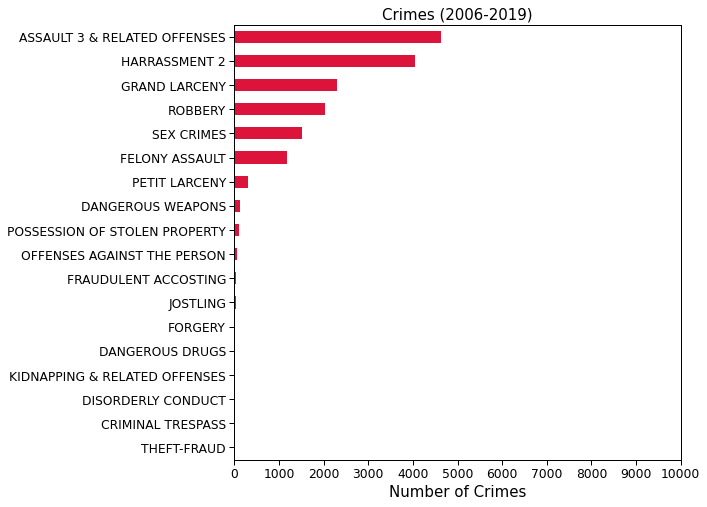

In [54]:
#plotting the crimes by # of crimes

crime_plot = plt.figure(figsize = (8, 8))
crime_plot = df2.Crime.value_counts().sort_values().plot(kind = 'barh', color = 'crimson')
plt.title("Crimes (2006-2019)", fontsize = 15)
plt.xlabel("Number of Crimes", fontsize = 15)
plt.xticks(np.arange(0, 11000, 1000))
plt.show()

In [62]:
df2['year'] = df2['Complaint_Date'].dt.year

AttributeError: Can only use .dt accessor with datetimelike values

In [65]:
#crimes by year 

crimes_number_by_year = plt.figure(figsize = (7,7))
crimes_number_by_year = df2.groupby(df2.index.year).count()['Crime'].plot(kind='bar', color = 'crimson')
plt.title("Number of Crimes by Year (2006-2019)", fontsize = 15)
plt.ylabel("Number of Crimes", fontsize = 15)
plt.xlabel("Arrest Years", fontsize = 15)
plt.yticks(np.arange(0, 5000, 1000))
plt.show()

AttributeError: 'Int64Index' object has no attribute 'year'

<Figure size 504x504 with 0 Axes>

In [64]:
#crimes by month 

crimes_number_by_month = plt.figure(figsize = (7,7))
crimes_number_by_month = df2.groupby(df2.index.month).count()['Crime'].plot(kind='bar', color = 'crimson')
plt.title("Number of Crimes by Month (2006-2019)", fontsize = 15)
plt.ylabel("Number of Crimes", fontsize = 15)
plt.xlabel("Arrest Months", fontsize = 15)
plt.yticks(np.arange(0, 500000, 100000))
plt.show()

AttributeError: 'Int64Index' object has no attribute 'month'

<Figure size 504x504 with 0 Axes>

In [59]:
#crimes in borough line graph by year 

crimes_borough_year = df2.groupby(['Borough', df2.index.year]).count()['Crime']
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(crimes_borough_year.loc['Bronx'], color='orange', label='Bronx')
plt.plot(crimes_borough_year.loc['Brooklyn'], color='green', label='Brooklyn')
plt.plot(crimes_borough_year.loc['Manhattan'], color='blue', label='Manhattan')
plt.plot(crimes_borough_year.loc['Queens'], color='black', label='Queens')
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.title('Number of Crimes by Borough (2006-2019)')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show

AttributeError: 'Int64Index' object has no attribute 'year'

In [66]:
#making new csv to save, to put into new notebook 

df2.to_csv('df2.csv')